<a href="https://colab.research.google.com/github/keziah-irene/Data_analysis_project/blob/main/DA_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERVISED MODEL - CAR EVALUATION DATASET

In [ ]:
import pandas as pd
data = pd.read_csv("Car_Evaluation_OneHot_encode.csv")
data.columns = data.columns.str.strip()
data.isnull().sum()

,0
class,0
Buying_Price_high,0
Buying_Price_low,0
Buying_Price_med,0
Maintenance_Price_high,0
Maintenance_Price_low,0
Maintenance_Price_med,0
No_of_Doors_2,0
No_of_Doors_3,0
No_of_Doors_4,0


In [ ]:
data.head(5)

,class,Buying_Price_high,Buying_Price_low,Buying_Price_med,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,No_of_Doors_2,No_of_Doors_3,No_of_Doors_4,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1


1. KNN CLASSIFICATION

Test set predictions: [0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 3 0 0 0 0 2 1 0
 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 1 1 0 0 0 0 0 0 0 1
 1 0 3 0 0 0 1 1 0 0 1 0 1 3 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 3 0 0 0 1 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 3 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 3 0 0 2 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 3 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 1 0 0 3 0 0 0 0 0 1 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1
 0 0 0 1 3 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 3 0 0 0 0 1
 0 

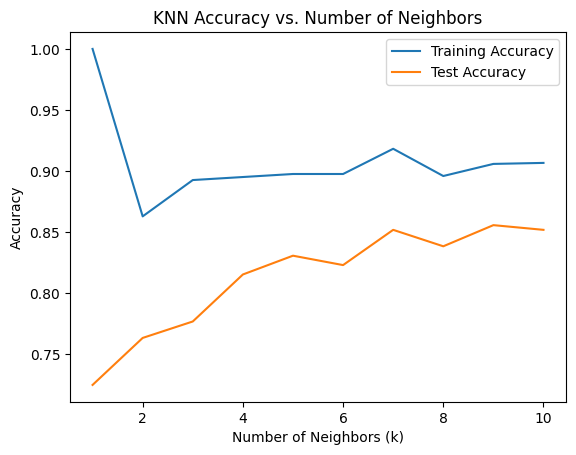

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# load dataset
data = pd.read_csv('Car_Evaluation_OneHot_encode.csv')

# target column
target_coln = 'class'

# features X and target y
X = data.drop(columns=target_coln)
y = data[target_coln]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42, stratify=y )

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fitting data with k value as 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# predicting
y_pred_knn = knn.predict(X_test_scaled)
print("Test set predictions:", y_pred_knn)
print("\nTest set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# Report for KNN
print("\n KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("\n Confusion Matrix:\n", cm)

# plotting with different k Values
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_test_scaled, y_test))

# training vs test accuracy
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.show()


2. LINEAR MODEL - LOGISTIC REGRESSION

Training set score (C=1): 0.914
Test set score (C=1): 0.924
Training set score (C=100): 0.941
Test set score (C=100): 0.942
Training set score (C=0.01): 0.708
Test set score (C=0.01): 0.715

Logistic Regression Report (C=1)
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       303
           1       0.79      0.93      0.85        96
           2       0.50      0.12      0.19        17
           3       0.87      0.81      0.84        16

    accuracy                           0.92       432
   macro avg       0.78      0.71      0.71       432
weighted avg       0.92      0.92      0.91       432

Confusion Matrix (C=1):
 [[295   8   0   0]
 [  5  89   2   0]
 [  0  13   2   2]
 [  0   3   0  13]]

Logistic Regression Report (C=100)
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       303
           1       0.87      0.90      0.88        96
           2       0.92      0.65      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


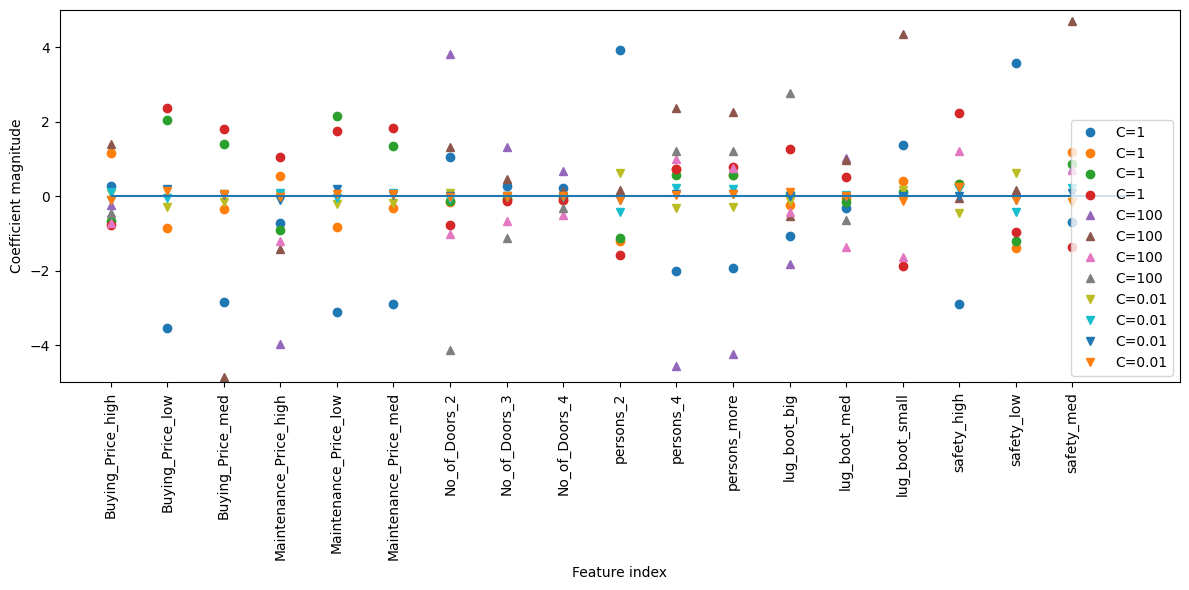

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# load dataset
data = pd.read_csv("Car_Evaluation_OneHot_encode.csv")

# target
target_cols = 'class'

# features
X = data.drop(columns=['class'])
y = data['class']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# C=1
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Training set score (C=1): {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score (C=1): {:.3f}".format(logreg.score(X_test, y_test)))

# C=100
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training set score (C=100): {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score (C=100): {:.3f}".format(logreg100.score(X_test, y_test)))

# C=0.01
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Training set score (C=0.01): {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score (C=0.01): {:.3f}".format(logreg001.score(X_test, y_test)))

# Reports for Logistic Regression
y_pred_c1 = logreg.predict(X_test)
print("\nLogistic Regression Report (C=1)")
print(classification_report(y_test, y_pred_c1))
print("Confusion Matrix (C=1):\n", confusion_matrix(y_test, y_pred_c1))

y_pred_c100 = logreg100.predict(X_test)
print("\nLogistic Regression Report (C=100)")
print(classification_report(y_test, y_pred_c100))
print("Confusion Matrix (C=100):\n", confusion_matrix(y_test, y_pred_c100))

y_pred_c001 = logreg001.predict(X_test)
print("\nLogistic Regression Report (C=0.01)")
print(classification_report(y_test, y_pred_c001))
print("Confusion Matrix (C=0.01):\n", confusion_matrix(y_test, y_pred_c001))

# plotting
plt.figure(figsize=(12,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.tight_layout()
plt.show()


3. RANDOM FOREST

Accuracy on training set (5 trees): 0.988
Accuracy on test set (5 trees): 0.856
Accuracy on training set (100 trees): 1.000
Accuracy on test set (100 trees): 0.919

Random Forest Report (5 trees)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       303
           1       0.67      0.80      0.73        96
           2       0.50      0.18      0.26        17
           3       0.55      0.38      0.44        16

    accuracy                           0.86       432
   macro avg       0.67      0.57      0.59       432
weighted avg       0.85      0.86      0.85       432

Confusion Matrix (5 trees):
 [[284  19   0   0]
 [ 16  77   0   3]
 [  0  12   3   2]
 [  0   7   3   6]]

Random Forest Report (100 trees)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       303
           1       0.81      0.88      0.84        96
           2       0.75      0.35      0.48        17
           3

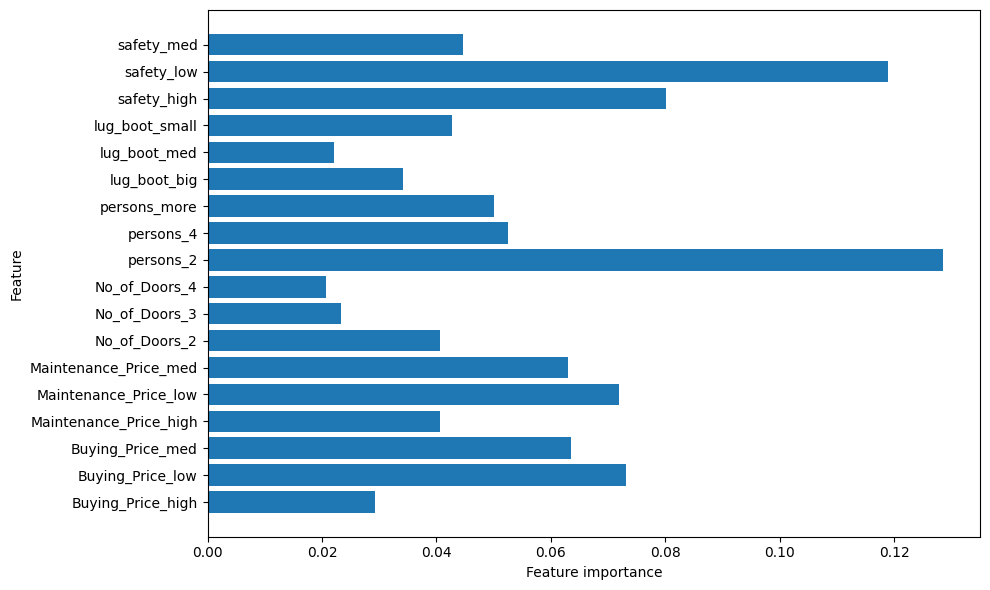

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# load dataset
data = pd.read_csv('Car_Evaluation_OneHot_encode.csv')

# target
target_cols = 'class'

# features
X = data.drop(columns=['class'])
y = data['class']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# small number of trees
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# larger number of trees
forest_large = RandomForestClassifier(n_estimators=100, random_state=0)
forest_large.fit(X_train, y_train)

# accuracy
print("Accuracy on training set (5 trees): {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set (5 trees): {:.3f}".format(forest.score(X_test, y_test)))
print("Accuracy on training set (100 trees): {:.3f}".format(forest_large.score(X_train, y_train)))
print("Accuracy on test set (100 trees): {:.3f}".format(forest_large.score(X_test, y_test)))

# Reports for Random Forest
y_pred_rf5 = forest.predict(X_test)
print("\nRandom Forest Report (5 trees)")
print(classification_report(y_test, y_pred_rf5))

# Confusion Matrix (5 trees)
cm_rf5 = confusion_matrix(y_test, y_pred_rf5)
print("Confusion Matrix (5 trees):\n", cm_rf5)

y_pred_rf100 = forest_large.predict(X_test)
print("\nRandom Forest Report (100 trees)")
print(classification_report(y_test, y_pred_rf100))

# Confusion Matrix (100 trees)
cm_rf100 = confusion_matrix(y_test, y_pred_rf100)
print("Confusion Matrix (100 trees):\n", cm_rf100)

# plotting feature importance
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

plot_feature_importances(forest_large, X.columns)


UNSUPERVISED MODEL - BOSTON HOUSING PRICE DATASET

In [ ]:
import pandas as pd
data = pd.read_csv("boston.csv")
data.columns = data.columns.str.strip()
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. K-MEANS CLUSTERING

Shape after PCA: (506, 13)


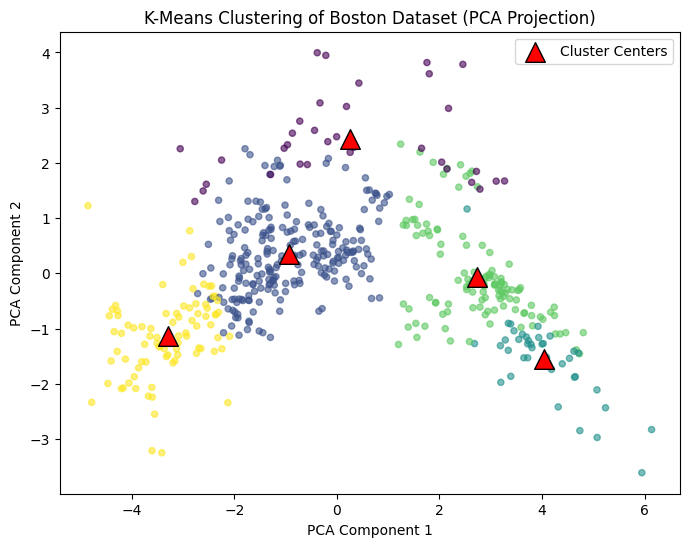

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("boston.csv")

# Drop the target column (MEDV)
X = df.drop("MEDV", axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=13, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Shape after PCA:", X_pca.shape)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 2D Scatter plot using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=20, alpha=0.6)
plt.scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker="^", c="red", s=200, edgecolor="black", label="Cluster Centers")
plt.title("K-Means Clustering of Boston Dataset (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

2. AGGLOMERATIVE CLUSTERING

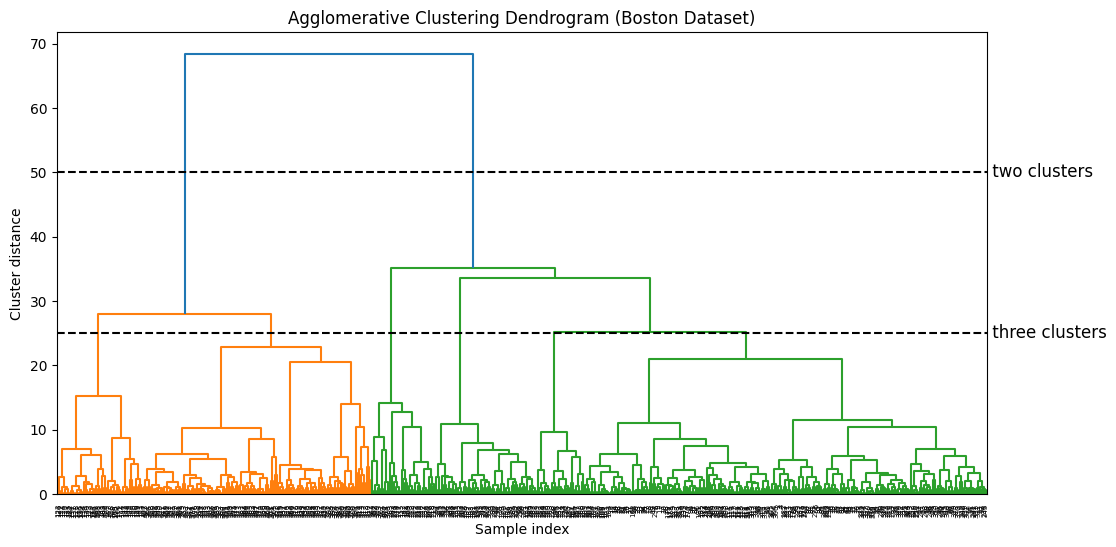

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("boston.csv")

# Select only numeric columns
data = df.select_dtypes(include=['int64', 'float64'])

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Perform Ward’s hierarchical clustering
linkage_array = ward(X_scaled)

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_array)

# Mark cuts for 2 and 3 clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [50, 50], '--', c='k')   # Example threshold for 2 clusters
ax.plot(bounds, [25, 25], '--', c='k')   # Example threshold for 3 clusters
ax.text(bounds[1], 50, ' two clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 25, ' three clusters', va='center', fontdict={'size': 12})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Agglomerative Clustering Dendrogram (Boston Dataset)")
plt.show()

3. DBSCAN

Cluster memberships:
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1  3
  3 -1  3  3  3  3  3  3 -1  3 -1 -1 -1  4  4  3 -1  4 -1 -1  4  4  4  4
  4  4  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  5  5  0 -1  0
  5  0  5  5 -1  5 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  6  6  6  6  6  6
  6 -1  6 -1 -1  5  0  0  0 -1 -1  0 -1 -1  0  0 -1  0 -1 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  

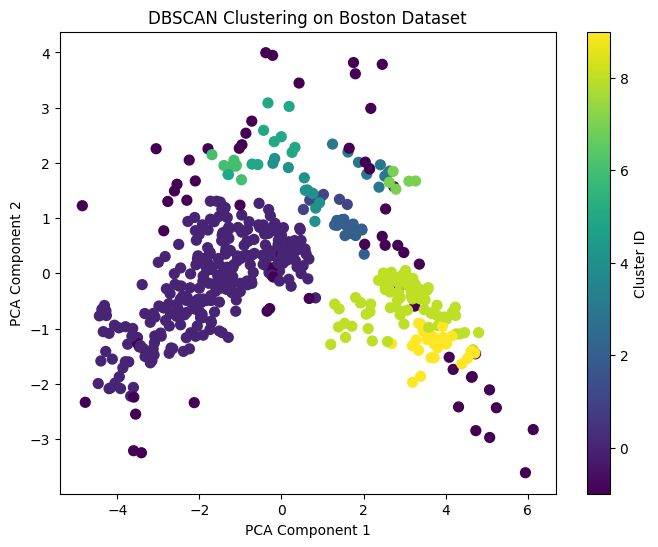

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("boston.csv")

# Drop target column
X = df.drop("MEDV", axis=1)

# Scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# tune eps & min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
print("Cluster memberships:\n", clusters)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plotting
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering on Boston Dataset")
plt.colorbar(label="Cluster ID")
plt.show()